In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("New.csv")
df.shape

FileNotFoundError: [Errno 2] No such file or directory: 'New.csv'

In [ ]:
df

In [ ]:
#2.Handling Missing values 
df.isnull().sum()

Country     1
Age         1
Salary      1
Purchase    0
dtype: int64

In [ ]:
age=df['Age'].fillna(df['Age'].mean())
salary=df['Salary'].fillna(df['Salary'].mean())
print(age)
print(salary)

0     44.000000
1     27.000000
2     30.000000
3     38.000000
4     40.000000
5     25.000000
6     40.538462
7     48.000000
8     50.000000
9     35.000000
10    42.000000
11    63.000000
12    39.000000
13    46.000000
Name: Age, dtype: float64
0     72000.000000
1     48000.000000
2     54000.000000
3     61000.000000
4     60307.692308
5     58000.000000
6     52000.000000
7     79000.000000
8     83000.000000
9     92000.000000
10    58000.000000
11    32000.000000
12    42000.000000
13    53000.000000
Name: Salary, dtype: float64


In [ ]:
print(df.dropna())

      Country   Age   Salary Purchase
0      France  44.0  72000.0       No
1       Spain  27.0  48000.0      Yes
2     Germany  30.0  54000.0       No
3       Spain  38.0  61000.0       No
5      France  25.0  58000.0      Yes
7      France  48.0  79000.0      Yes
9       India  35.0  92000.0      Yes
10    America  42.0  58000.0       No
11     Russia  63.0  32000.0      Yes
12     Canada  39.0  42000.0       No
13  Australia  46.0  53000.0      Yes


In [ ]:
Country=df['Country'].fillna(df['Country'].mode()[0])
print(Country)

0        France
1         Spain
2       Germany
3         Spain
4       Germany
5        France
6         Spain
7        France
8        France
9         India
10      America
11       Russia
12       Canada
13    Australia
Name: Country, dtype: object


In [ ]:
#3.Discretization: 
age_bins = pd.cut(df['Age'], bins=3, labels=['Young', 'Middle', 'Old']) 
print(age_bins) 

0     Middle
1      Young
2      Young
3     Middle
4     Middle
5      Young
6        NaN
7     Middle
8     Middle
9      Young
10    Middle
11       Old
12    Middle
13    Middle
Name: Age, dtype: category
Categories (3, object): ['Young' < 'Middle' < 'Old']


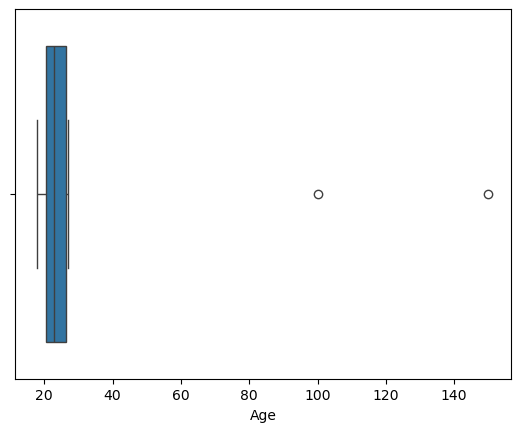

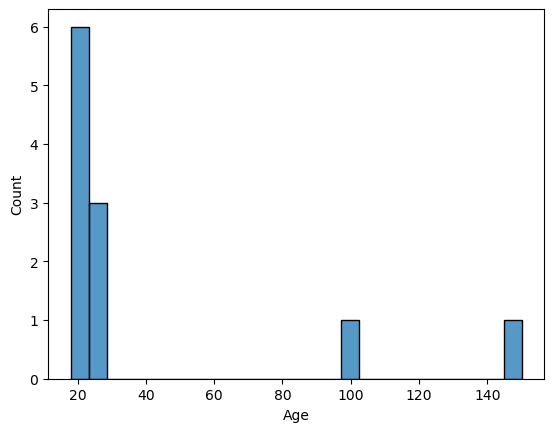

In [ ]:
#4.Outlier Detection 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = {'Age': [18, 19, 20, 21, 22, 23, 100, 25, 26, 27, 150]}  # 100 and 150 are  
df = pd.DataFrame(data) 
sns.boxplot(x=df['Age']) 
plt.show() 
sns.histplot(x=df['Age']) 
plt.show()

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) 
Q1 = df["Age"].quantile(0.25) 
Q3 = df["Age"].quantile(0.75) 
IQR = Q3 - Q1

In [ ]:
# Define lower and upper bounds 
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR 

In [ ]:
# Find outliers 
outliers = df[(df["Age"] < lower_bound) | (df["Age"] > upper_bound)] 
print("Outliers:\n", outliers) 

Outliers:
     Age
6   100
10  150


In [ ]:
#print(df["Age"]) 
df_clean = df[(df["Age"] >= lower_bound) & (df["Age"] <= upper_bound)] 
print("Cleaned Data:\n", df_clean) 


Cleaned Data:
    Age
0   18
1   19
2   20
3   21
4   22
5   23
7   25
8   26
9   27


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

In [ ]:
df=pd.read_csv("News.csv")
df

,Country,Age,Salary,Purchase
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,25.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,India,35.0,92000.0,Yes


In [ ]:
scaler=StandardScaler()
df[['Age','Salary']]=scaler.fit_transform(df[['Age','Salary']])
print(df)

      Country       Age    Salary Purchase
0      France  0.350325  0.715994       No
1       Spain -1.370158 -0.753678      Yes
2     Germany -1.066544 -0.386260       No
3       Spain -0.256905  0.042394       No
4     Germany -0.054495       NaN      Yes
5      France -1.572568 -0.141315      Yes
6       Spain       NaN -0.508733       No
7      France  0.755144  1.144648      Yes
8     Germany  0.957554  1.389594       No
9       India -0.560519  1.940721      Yes
10    America  0.147915 -0.141315       No
11     Russia  2.273217 -1.733459      Yes
12     Canada -0.155700 -1.121096       No
13  Australia  0.552734 -0.447496      Yes


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
df[['Age','Salary']]=scaler.fit_transform(df[['Age','Salary']])
print(df)

      Country       Age    Salary Purchase
0      France  0.500000  0.666667       No
1       Spain  0.052632  0.266667      Yes
2     Germany  0.131579  0.366667       No
3       Spain  0.342105  0.483333       No
4     Germany  0.394737       NaN      Yes
5      France  0.000000  0.433333      Yes
6       Spain       NaN  0.333333       No
7      France  0.605263  0.783333      Yes
8     Germany  0.657895  0.850000       No
9       India  0.263158  1.000000      Yes
10    America  0.447368  0.433333       No
11     Russia  1.000000  0.000000      Yes
12     Canada  0.368421  0.166667       No
13  Australia  0.552632  0.350000      Yes


In [ ]:
scaler=LabelEncoder()
df['Country']=scaler.fit_transform(df['Country'])
print(df)

    Country       Age    Salary Purchase
0         3  0.500000  0.666667       No
1         7  0.052632  0.266667      Yes
2         4  0.131579  0.366667       No
3         7  0.342105  0.483333       No
4         4  0.394737       NaN      Yes
5         3  0.000000  0.433333      Yes
6         7       NaN  0.333333       No
7         3  0.605263  0.783333      Yes
8         4  0.657895  0.850000       No
9         5  0.263158  1.000000      Yes
10        0  0.447368  0.433333       No
11        6  1.000000  0.000000      Yes
12        2  0.368421  0.166667       No
13        1  0.552632  0.350000      Yes


In [ ]:
scaler=LabelEncoder()
df['Purchase']=scaler.fit_transform(df['Purchase'])
print(df)

    Country       Age    Salary  Purchase
0         3  0.500000  0.666667         0
1         7  0.052632  0.266667         1
2         4  0.131579  0.366667         0
3         7  0.342105  0.483333         0
4         4  0.394737       NaN         1
5         3  0.000000  0.433333         1
6         7       NaN  0.333333         0
7         3  0.605263  0.783333         1
8         4  0.657895  0.850000         0
9         5  0.263158  1.000000         1
10        0  0.447368  0.433333         0
11        6  1.000000  0.000000         1
12        2  0.368421  0.166667         0
13        1  0.552632  0.350000         1


In [ ]:
#Correlation matrix : 
df.corr(method='pearson')

,Country,Age,Salary,Purchase
Country,1.000000,-0.089070,-0.095534,0.066815
Age,-0.089070,1.000000,-0.079532,0.003604
Salary,-0.095534,-0.079532,1.000000,0.001454
Purchase,0.066815,0.003604,0.001454,1.000000


<Axes: >

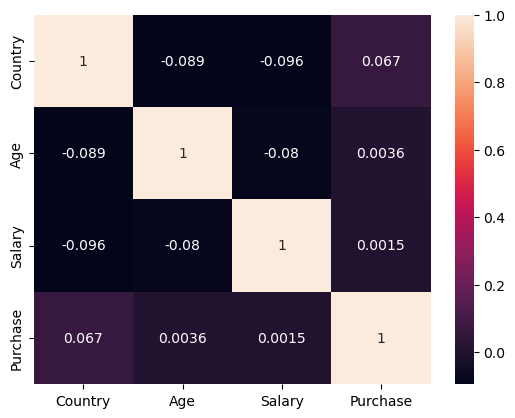

In [ ]:
#heatmap  
import seaborn as sns 
sns.heatmap(df.corr(),annot=True)

In [ ]:
#for categorical :chi-square test 
from sklearn.feature_selection import chi2 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
import pandas as pd

In [ ]:
X = df.iloc[:,0:4] # Features 
y = df.iloc[:,-1]  # Target variable

In [ ]:
X_encoded = X.apply(LabelEncoder().fit_transform) 

In [ ]:
chi2_values, p_values = chi2(X_encoded, y)

In [ ]:
chi2_results = pd.DataFrame({ 
'Feature': X.columns,
'Chi-Square Value': chi2_values, 
'P-Value': p_values 
})

In [ ]:
print(chi2_results) 

    Feature  Chi-Square Value   P-Value
0   Country          0.071429  0.789268
1       Age          0.890110  0.345448
2    Salary          0.190476  0.662521
3  Purchase          7.000000  0.008151


In [ ]:
selected_features = chi2_results[chi2_results['P-Value'] < 0.05]['Feature'] 
print("Selected Features based on Chi-Square test:", selected_features)

Selected Features based on Chi-Square test: 3    Purchase
Name: Feature, dtype: object


In [ ]:
#Dimensionality Reduction: 
from sklearn.decomposition import PCA 
import pandas as pd 

In [ ]:
data = { 
'Feature1': [1, 2, 3, 4, 5], 
'Feature2': [5, 4, 3, 2, 1], 
'Feature3': [2, 3, 4, 5, 6], 
'Target': [1, 0, 1, 0, 1] 
}
df = pd.DataFrame(data)

In [ ]:
X = df.drop('Target', axis=1)

In [ ]:
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(X)

In [ ]:
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2']) 
print(principal_df)

        PC1           PC2
0 -3.464102  3.708359e-16
1 -1.732051 -1.236120e-16
2  0.000000 -0.000000e+00
3  1.732051  1.236120e-16
4  3.464102  2.472239e-16
